In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('forestcov.csv')

In [3]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df=data.copy()

In [5]:
df.apply(lambda x:x.isnull().sum()) #checking if any columns contains any null values

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


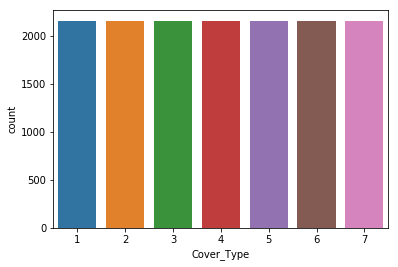

In [6]:
ax = sns.countplot(df['Cover_Type'],label="Count")
plt.show()



In [7]:
len(df.columns)

56

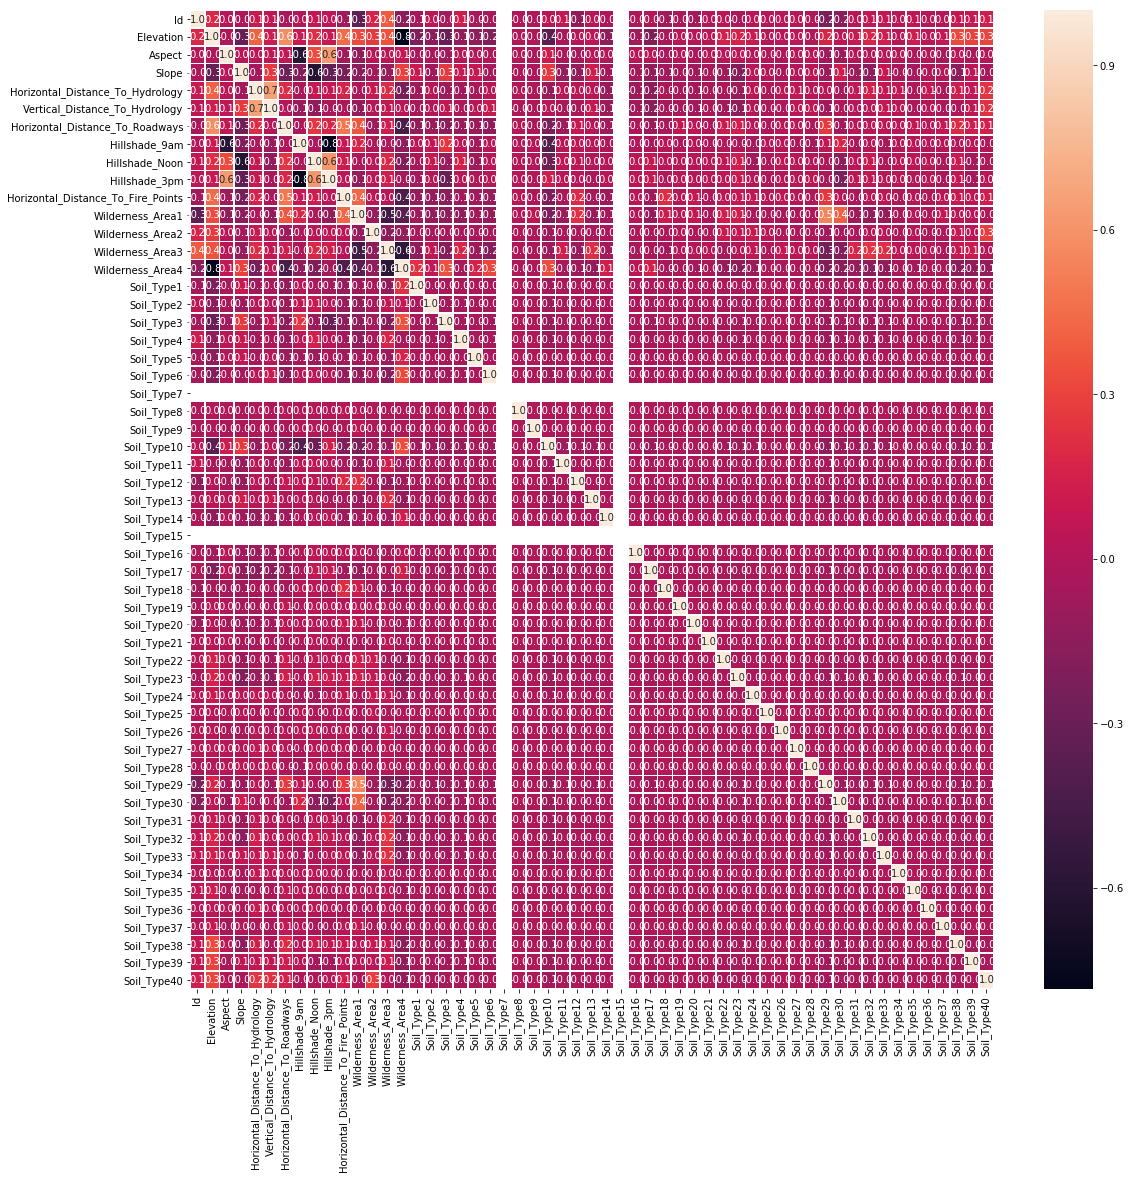

In [8]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.drop('Cover_Type',axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [9]:
#Feature Selection since there are multiple feature and we need to selec the most important feature for faster
#training

In [10]:
from sklearn.model_selection import train_test_split #splitting the data into train and test data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Cover_Type',axis=1),df['Cover_Type'],
                                                   random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()   #standardising the x and y axis in order to bring them to same scale

In [13]:
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)


('Optimal number of features :', 27)


In [17]:
print('Best features :', df.drop('Cover_Type',axis=1).columns[rfecv.support_]) #the columns whose features matters

('Best features :', Index([u'Id', u'Elevation', u'Aspect', u'Slope',
       u'Horizontal_Distance_To_Hydrology', u'Vertical_Distance_To_Hydrology',
       u'Horizontal_Distance_To_Roadways', u'Hillshade_9am', u'Hillshade_Noon',
       u'Hillshade_3pm', u'Horizontal_Distance_To_Fire_Points',
       u'Wilderness_Area1', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type2', u'Soil_Type3', u'Soil_Type4', u'Soil_Type10',
       u'Soil_Type12', u'Soil_Type17', u'Soil_Type22', u'Soil_Type23',
       u'Soil_Type30', u'Soil_Type32', u'Soil_Type38', u'Soil_Type39',
       u'Soil_Type40'],
      dtype='object'))


In [19]:
X=df[df.drop('Cover_Type',axis=1).columns[rfecv.support_]] #only containing those columns whose features matters

In [20]:
y=df['Cover_Type']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 0) #again splitting the data into test train split

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix

('Accuracy is: ', 0.86084656084656086)


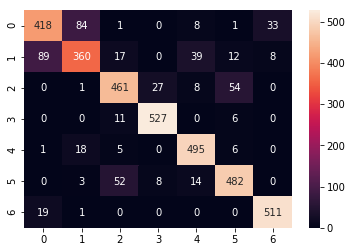

In [32]:
clf_rf = RandomForestClassifier(n_estimators = 1000, min_samples_leaf=1,max_depth=None,random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)
ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()